In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set the path to the file you'd like to load
file_path = "dataset/synthetic_coffee_health_10000.csv"

# Load the latest version
df = pd.read_csv(file_path)

df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [3]:
interesting = df[["Age","Coffee_Intake","Caffeine_mg","Sleep_Hours","Sleep_Quality","BMI","Heart_Rate","Stress_Level","Health_Issues"]]

interesting.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Health_Issues
0,40,3.5,328.1,7.5,Good,24.9,78,Low,NaN
1,33,1.0,94.1,6.2,Good,20.0,67,Low,NaN
2,42,5.3,503.7,5.9,Fair,22.7,59,Medium,Mild
3,53,2.6,249.2,7.3,Good,24.7,71,Low,Mild
4,32,3.1,298.0,5.3,Fair,24.1,76,Medium,Mild


In [4]:
hmm = df[df["Age"] == 22]

hmm.describe().loc[['std',"mean"]]

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
std,3014.615973,0.0,1.422944,135.008750,1.220976,3.914747,9.734910,4.237599,0.412921,0.476716
mean,5132.932990,22.0,2.484021,235.686598,6.745361,23.937113,70.530928,7.097423,0.216495,0.345361


In [5]:
data = df.to_numpy()

print(data)

[[1 40 'Male' ... 'Other' 0 0]
 [2 33 'Male' ... 'Service' 0 0]
 [3 42 'Male' ... 'Office' 0 0]
 ...
 [9998 26 'Male' ... 'Student' 1 1]
 [9999 40 'Female' ... 'Student' 0 0]
 [10000 42 'Female' ... 'Student' 1 0]]


In [6]:
#Calculate average value of the numerical values per age (18-80)

averages = np.zeros((6,63))

catg = [4,5,6,8,9,11]  #in order: coffee, caffeine, sleep, bmi, heart rate, physical activity

for k, arr in enumerate(averages):              #iterate over categories
    for i in range(18,81,1):        #iterate over ages
        counter = 0
        for j, age in enumerate(data[:,1]):
            if age == i:
                arr[i-18] += data[j,catg[k]]
                counter += 1
        if counter != 0:
            arr[i-18] = arr[i-18]/counter

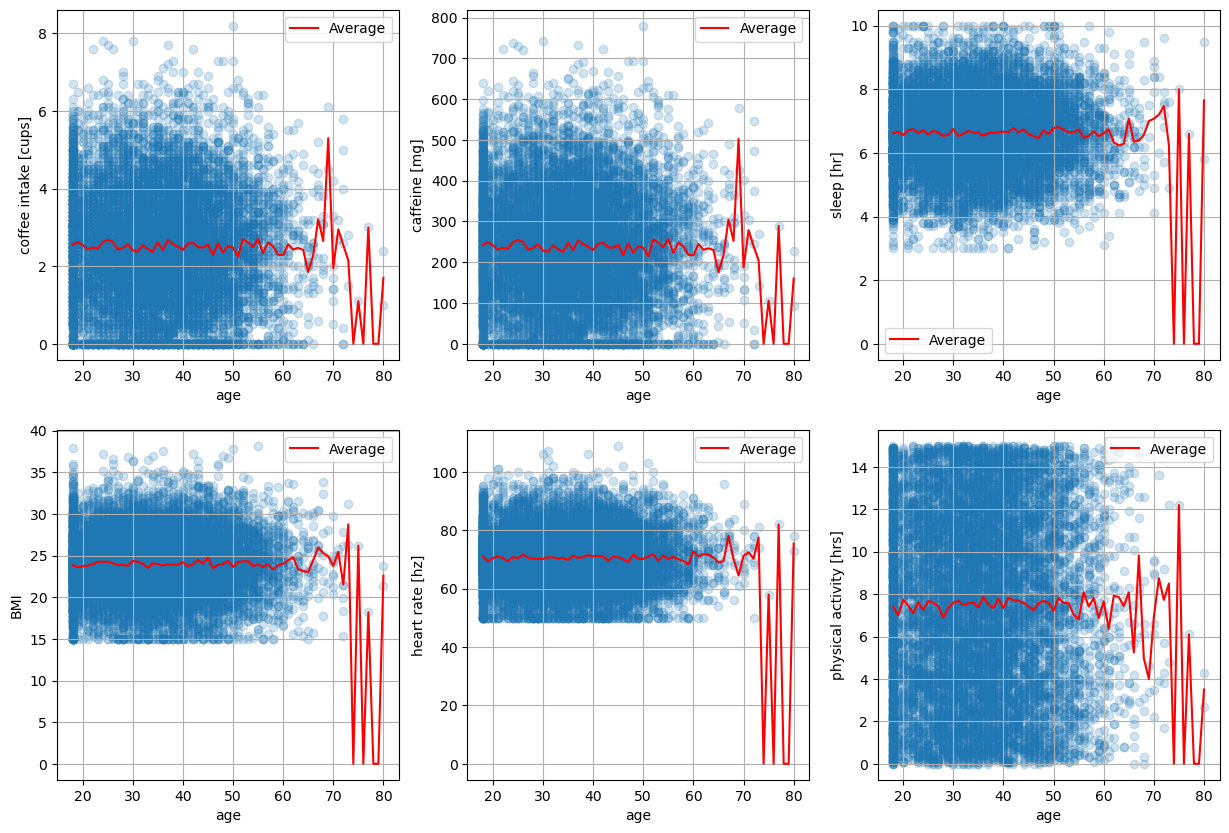

In [7]:
fig, ax = plt.subplots(2,3,figsize=(15,10))

age = np.linspace(18,80,63)

ax[0,0].scatter(data[:,1], data[:,4], alpha=0.2)
ax[0,0].plot(age, averages[0][:], label="Average",color="red")
ax[0,0].grid()
ax[0,0].set_xlabel("age")
ax[0,0].set_ylabel("coffee intake [cups]")
ax[0,0].legend()

ax[0,1].scatter(data[:,1], data[:,5], alpha=0.2)
ax[0,1].plot(age, averages[1][:], label="Average",color="red")
ax[0,1].grid()
ax[0,1].set_xlabel("age")
ax[0,1].set_ylabel("caffeine [mg]")
ax[0,1].legend()

ax[0,2].scatter(data[:,1], data[:,6], alpha=0.2)
ax[0,2].plot(age, averages[2][:], label="Average",color="red")
ax[0,2].grid()
ax[0,2].set_xlabel("age")
ax[0,2].set_ylabel("sleep [hr]")
ax[0,2].legend()

ax[1,0].scatter(data[:,1], data[:,8], alpha=0.2)
ax[1,0].plot(age, averages[3][:], label="Average",color="red")
ax[1,0].grid()
ax[1,0].set_xlabel("age")
ax[1,0].set_ylabel("BMI")
ax[1,0].legend()

ax[1,1].scatter(data[:,1], data[:,9], alpha=0.2)
ax[1,1].plot(age, averages[4][:], label="Average",color="red")
ax[1,1].grid()
ax[1,1].set_xlabel("age")
ax[1,1].set_ylabel("heart rate [hz]")
ax[1,1].legend()

ax[1,2].scatter(data[:,1], data[:,11], alpha=0.2)
ax[1,2].plot(age, averages[5][:], label="Average",color="red")
ax[1,2].grid()
ax[1,2].set_xlabel("age")
ax[1,2].set_ylabel("physical activity [hrs]")
ax[1,2].legend()

Text(0, 0.5, 'Sleep hours')

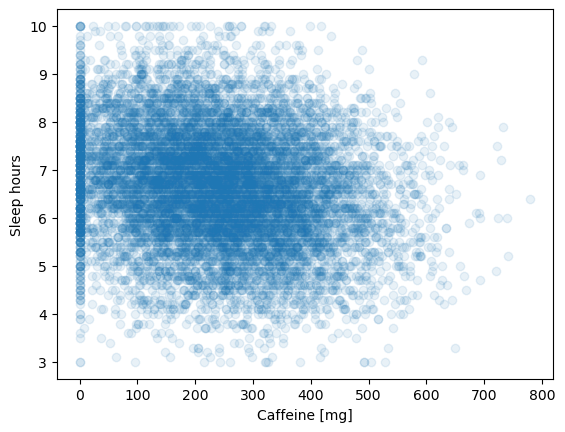

In [8]:
#Plot Sleep hours over Caffeine, see some declining trend, more caffeine, less sleep, just as shown in the correlation matrix

plt.scatter(data[:,5], data[:,6], alpha=0.1)
plt.xlabel("Caffeine [mg]")
plt.ylabel("Sleep hours")

Text(0, 0.5, 'Caffeine [mg]')

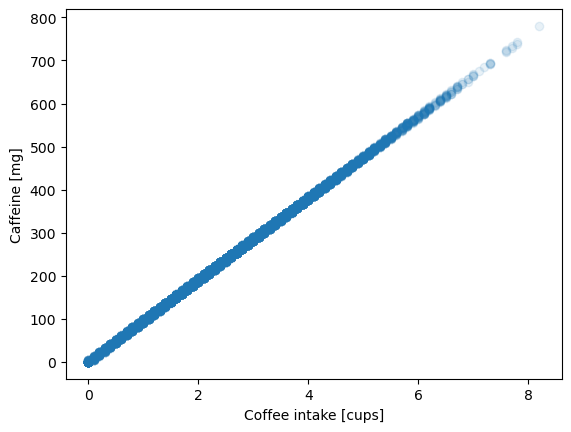

In [9]:
#Well, no surprise

plt.scatter(data[:,4], data[:,5], alpha=0.1)
plt.xlabel("Coffee intake [cups]")
plt.ylabel("Caffeine [mg]")